In [157]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [177]:
police_df =pd.read_csv('police.csv')

In [171]:
police_df

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [173]:
police_df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [174]:
police_df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

# Remove columns that contains missing Values 

In [7]:
police_df.drop('county_name', axis='columns', inplace = True)

In [9]:
police_df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

# Violation by Gender (Male and Female)

In [29]:
police_df[police_df['violation']== 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

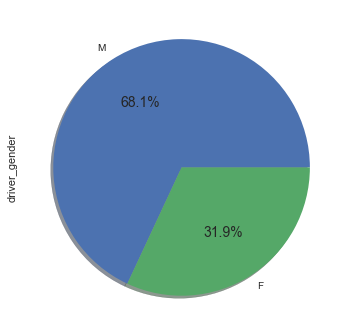

In [153]:
#plt.figure(figsize = (8,4))
plt.xticks(rotation=45,size=23)
#sns.countplot(police_df[police_df['violation']== 'Speeding'].driver_gender.value_counts(), data=police_df)
#plt.show()
police_df[police_df['violation']== 'Speeding'].driver_gender.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True)
plt.show()

In [41]:
police_df[police_df['driver_gender']== 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [42]:
police_df[police_df['driver_gender']== 'F'].violation.value_counts()


Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64

In [142]:
police_df.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


# Things to note in answering the question


# Does gender affect who get Stopped

In [131]:
police_df.search_conducted.value_counts(normalize=True)


False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [140]:
#get the percentage for TRUE of serach conducted on each gender
police_df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [45]:
#get the percentage for TRUE of serach conducted on each gender
police_df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

If we're to summarize the above DATASET, Males are getting searched at a higher rate

# Why is search type missing

1,My hypothesis could state the reason for the missing search type is because there was no police search done

2,There were errros in the dataset

In [105]:
police_df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
frisk                 88545
dtype: int64

In [47]:
police_df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

<AxesSubplot:ylabel='search_conducted'>

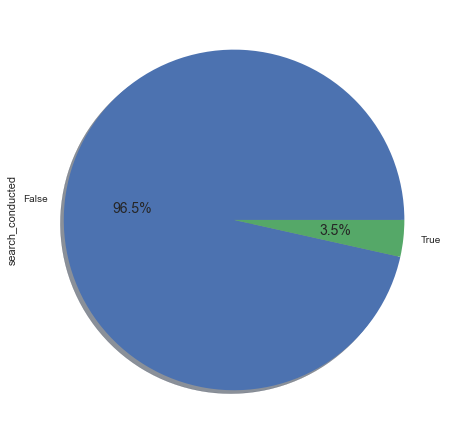

In [150]:
plt.figure(figsize = (6.8,7.3))
police_df.search_conducted.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)

Dismissing my above hyposthesis. Search 3196=True means searches occured. 
while 88545=False means searches did not occur. Therefore the 88545 search_type column is missing 
because 88545 searches were not conducted 

In [73]:
police_df['search_type'].value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

# During the Search how Many time is the driver frisked

In [175]:
#serching for keywords that contains the word protective frisk and 
frisk=police_df['frisk'] = police_df.search_type.str.contains('Protective Frisk')

In [176]:
frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: search_type, dtype: int64

In [109]:
frisk.sum()

274

In [110]:
frisk.mean()

0.08573216520650813

# Which year had the least number of stops

In [115]:
#slicing the data to get the first 4 character. Remember it's in a string
police_df.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [116]:
#this is a string method to concat the stop date and stop time and seperate by a space
combined= police_df.stop_date.str.cat(police_df.stop_time, sep= ' ')

In [117]:
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [118]:
#convert the combine section into a datetime
police_df['stop_datetime']=pd.to_datetime(combined)

In [120]:
police_df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


2005 had the list number of stops 

In [122]:
# dt datetime attribute has the ability to sort diff days, year and week
police_df.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

# How does the drug Activity Change by day?

In [133]:
police_df.drugs_related_stop.mean() 

0.008883705213590434

In [163]:

police_df.groupby(police_df.stop_datetime.dt.hour).drugs_related_stop.mean()


stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

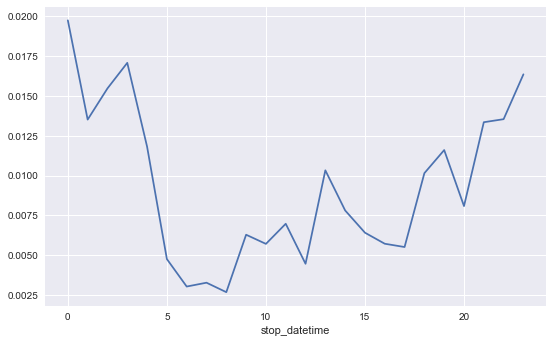

In [164]:
plt.style.use('seaborn')
police_df.groupby(police_df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()
plt.show()

# Ages Distribution of Drivers searched?

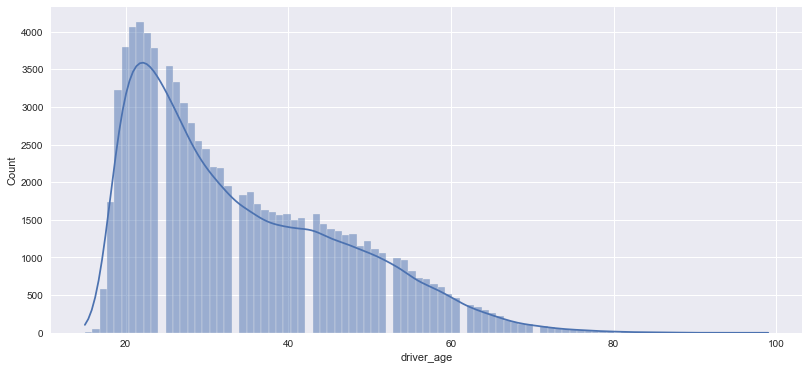

In [159]:
plt.figure(figsize=(12,6))
sns.histplot(police_df.driver_age, kde=True)
plt.show()

# Do most 'search stop' happen at night 

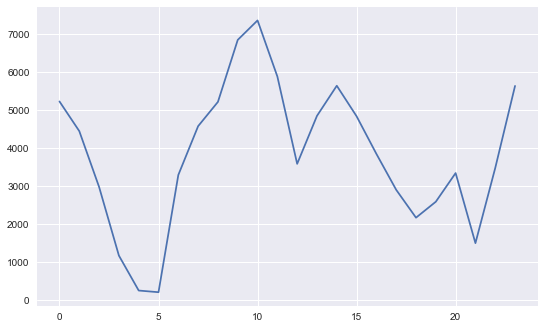

In [169]:
police_df.stop_datetime.dt.hour.value_counts().sort_index().plot()
plt.show()